### Comparison with distribution from Prokof'ev slides

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncexpon
from scipy.integrate import quad, simps
from math import e

In [11]:
# Truncated exponential distribution based on Prokof'ev slides
def p(tau,loc,b,dV):
    '''Truncated exponential from Prokof'ev slides'''
    return dV*e**(-dV*(tau-loc))/(1-e**(-dV*b))

In [12]:
def nist(x,x0,mu,sigma):
    '''NIST definition of the truncated exponential'''
    return (1/sigma)*e**(-(x-mu)/sigma)/(1-e**(-(x0-mu)/sigma))

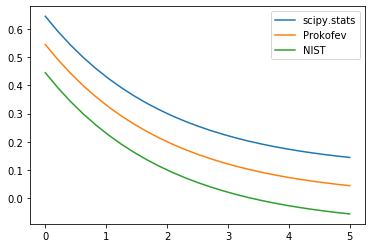

In [16]:
# Distribution parameters
loc = 0

x = np.linspace(loc,loc+b,25)
xmax = x[-1]
xmin = x[0]
b = xmax-xmin

dV = 0.5 #scale
scale = 1/dV

# scipy.stats
pdf = truncexpon.pdf(x,b=b/scale,loc=loc,scale=scale)
A = simps(pdf,x)
#print(A) # Check normalization

# Prokof'ev
proko = p(x,loc,b,dV)
B = simps(y,x)
#print(B)

# NIST
mu = loc
sigma = 1/dV
NIST = nist(x,b,mu,sigma)

# Plot the three distributions
plt.plot(x,pdf+0.1,label='scipy.stats')
plt.plot(x,proko,label='Prokofev')
plt.plot(x,NIST-0.1,label='NIST')
plt.legend()